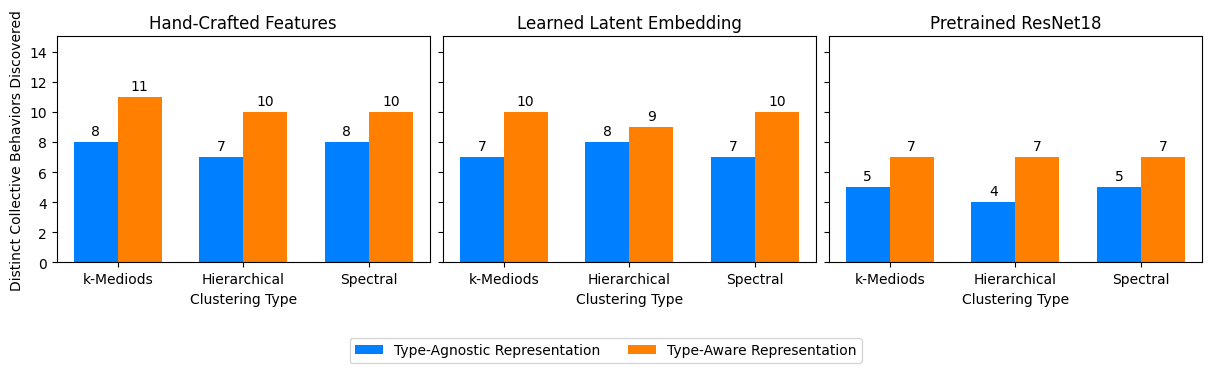

In [103]:
import matplotlib.pyplot as plt
import numpy as np

experiments = [
    "Hand-Crafted Features",
    "Learned Latent Embedding",
    # "Features + Learned Embedding",
    "Pretrained ResNet18"
]
species = ("k-Mediods", "Hierarchical", "Spectral")
penguin_means = {
    'Type-Agnostic Representation': [
        (8, 7, 8),
        (7, 8, 7),
        # (10, 9, 8),
        (5, 4, 5),
    ],
    'Type-Aware Representation': [
        (11, 10, 10),
        (10, 9, 10),
        # (8, 7, 7),
        (7, 7, 7),
    ],
    # 'Type-Agnostic Random': [
    #     (7, 8, 7),
    #     (7, 6, 10),
    #     (7, 7, 7),
    #     (10, 10, 9),
    # ],
    # 'Type-Aware Random': [
    #     (6, 9, 6),
    #     (9, 9, 8),
    #     (9, 8, 9),
    #     (9, 8, 9),
    # ],
}

x = np.arange(len(species))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1, 3, layout='constrained', sharey=True)
fig.set_figwidth(12)
fig.set_figheight(3)

colors=[(0/255, 128/255, 1.0), (255/255, 128/255, 0/255), (0.6, 0.6, 0.6), (0.8, 0.8, 0.8)]

for i in range(3):
    multiplier = 0
    for attribute, measurement in penguin_means.items():
        offset = width * multiplier + (width / 2)
        rects = ax[i].bar(x + offset, measurement[i], width, label=attribute, color=colors[multiplier])
        ax[i].bar_label(rects, padding=3)
        multiplier += 1

    # ax[i].set_ylabel('Length (mm)')
    ax[i].set_title(experiments[i])
    ax[i].set_xticks(x + width, species)
    ax[i].set_xlabel("Clustering Type")

    ax[i].set_ylim(0, 15)

# rects = ax[4].bar([0, 0.5], [7.2, 0], width, color=(0.6, 0.6, 0.6))
# ax[4].bar_label(rects, padding=3)
# ax[4].set_title("Baselines")
# ax[4].set_xticks([0, 0.5], ["Random", "Swarm Chemistry"])
# ax[4].set_ylim(0, 15)

def legend_without_duplicate_labels(fig, ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    fig.legend(*zip(*unique), loc='lower center', ncol=2, bbox_to_anchor=(0.5,-0.20))

ax[0].set_ylabel("Distinct Collective Behaviors Discovered")
legend_without_duplicate_labels(fig, ax[0])
plt.show()